In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_camph_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Camphene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
1,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.222222
2,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.222222
3,4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.222222
4,5,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74997,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74998,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [6]:
X = df_knn.drop(['X..Camphene', 'index'], axis = 1)
y = df_knn[['X..Camphene']]

Plotting histograms on target variable

In [7]:
y_array = y.to_numpy()
y_array

array([[0.22222222],
       [0.22222222],
       [0.22222222],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

<AxesSubplot:ylabel='Count'>

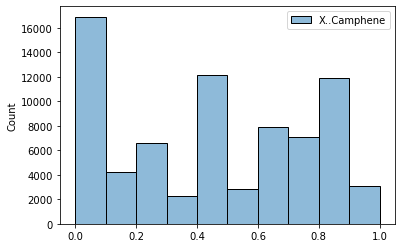

In [8]:
sns.histplot(y, bins = 10)

Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [10]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [11]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_knreg)

0.10652374214263102

In [13]:
mean_squared_error(y_val, y_pred_knreg)

0.03384755560210462

In [14]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1839770518355608

In [15]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8281239044021439

In [16]:
#val
r2_score(y_val, y_pred_knreg)

0.6945984574203141

Residual plots for each target variable

Feature Selection

In [17]:
rfreg = RandomForestRegressor()

In [18]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [19]:
selector.estimator_.feature_importances_

array([9.01061264e-02, 8.74856094e-02, 8.79696840e-02, 9.13609470e-02,
       9.23998098e-02, 3.36432065e-02, 2.13872961e-02, 2.96795720e-02,
       1.20136161e-04, 4.80095609e-03, 4.12833905e-03, 7.03111893e-08,
       5.89312573e-03, 9.27577655e-05, 3.96470304e-03, 5.27014186e-03,
       7.35637257e-03, 6.13470923e-03, 1.04625617e-06, 8.89628763e-03,
       2.29000642e-06, 6.65627273e-07, 6.70433687e-03, 5.46821387e-03,
       8.12674601e-03, 1.87578638e-03, 6.87823425e-03, 9.78840749e-05,
       3.14770462e-07, 3.15939078e-03, 8.14091370e-03, 4.40469177e-08,
       6.50022063e-03, 0.00000000e+00, 0.00000000e+00, 5.25711752e-03,
       5.61256287e-03, 7.81646290e-03, 1.71398688e-03, 9.37856732e-05,
       1.58215949e-04, 5.69076215e-03, 2.96617231e-04, 1.16696606e-02,
       1.30186164e-03, 4.65780639e-03, 1.68413641e-03, 3.12085383e-04,
       1.40674339e-02, 1.15053285e-03, 1.55468292e-01, 9.27424991e-03,
       3.10703192e-03, 1.98070980e-03, 6.31395939e-03, 1.12774044e-03,
      

In [20]:
selector.threshold_

0.011627906976744186

In [21]:
mask = selector.get_support()

In [22]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [23]:
selected_features = X.columns[mask]

In [24]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,blueberry,citrus,diesel,mango
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,0,0,0
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,0,0
3,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,0,0
4,0.356758,-0.100188,-0.099331,-0.001421,0.006253,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0
74998,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0


In [25]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'blueberry',
 'citrus',
 'diesel',
 'mango']

In [26]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_camph.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_camph.pkl")

['selector_knn_lsa_elbow_camph.pkl']

Train test split (after Feature Selection)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [28]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [29]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [30]:
mean_absolute_error(y_val, y_pred_knreg)

0.11081484748790305

In [31]:
mean_squared_error(y_val, y_pred_knreg)

0.034324255061194305

In [32]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.18526806271236904

In [33]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8079046314480003

In [34]:
#val
r2_score(y_val, y_pred_knreg)

0.6916503171569753

Hyperparameter Tuning

In [35]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [36]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [38]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [39]:
knreg_ht = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [40]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.05245700733549785

In [41]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.1373380246572891

In [42]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9719836063846717

In [43]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8305568647237735

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [44]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [45]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_camph.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_camph.pkl")

['y_test_knreg_lsa_elbow_camph.pkl']

In [46]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.05048839786517373

In [47]:
mean_squared_error(y_test, y_pred_knreg_test)

0.018388692752625283

In [48]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.13560491419054577

In [49]:
r2_score(y_test, y_pred_knreg_test)

0.836835952527882

In [50]:
y_test

,X..Camphene
11591,0.888889
52020,0.000000
34666,0.222222
22169,0.555556
23049,0.000000
...,...
60863,0.777778
32316,1.000000
60933,0.777778
43206,0.250000


In [51]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

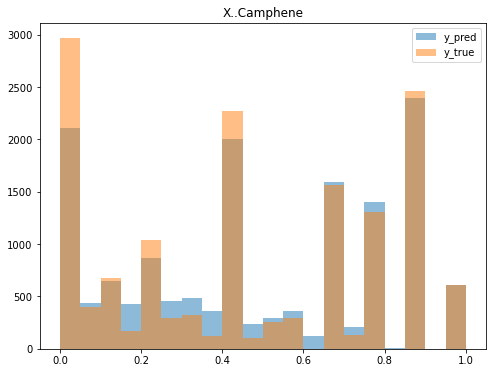

<Figure size 432x288 with 0 Axes>

In [52]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Camphene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_camph.png')

Pearson R

In [53]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.918
P-value: 0.000


<AxesSubplot:>

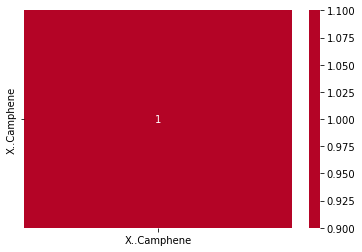

In [54]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)